# Building the game's basic setup

## Creating an empty pygame window and taking input from users
We will be creating a pygame window in a file *alien_invasion.py*. This will be our main file from where we might call other functions/methods from modules as the need arises. So make this file and add the following code in it. This code simply creates an empty display window which ends the program when we close it.

*Note: You can create and edit .py files in whatever editor you like VSCode, Sublime text, Atom even notepad. In order to run them open the terminal(if on linux) or cmd(if on Windows) in that folder and run the command* `python filename.py` *or* `python3 filename.py`.

In [ ]:
import sys
import pygame

def run_game():
    # Initialize game and create a screen object.
    pygame.init()
    screen = pygame.display.set_mode((1200, 800)) #creates the display window which here would be our game window
    pygame.display.set_caption("Alien Invasion") # sets the title for the display window
    bg_color = (230,230,230)
    # Start the main loop for the game.
    while True:
        # Watch for keyboard and mouse events.
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                sys.exit()
                
        # Draw the screen with the desired colour at each pass
        screen.fill(bg_color)
      
        # Make the most recently drawn screen visible.
        pygame.display.flip()

run_game()

We import the *sys* and *pygame* modules. The *pygame* module contains the functionality needed to make a game while we are using the *sys* module to exit the game when the player quits.

The method *pygame.init()* initializes background settings that Pygame needs to work properly. We also call *pygame.display.set_mode()* to create a display window called screen, on which we’ll draw all of the game’s graphical elements. The argument (1200, 800) is a tuple that defines the dimensions of the game window(width and height). The screen object is a *surface*. One thing to note here is that when we activate the game’s animation loop, this surface is automatically redrawn on every pass through the loop.

The game is controlled by a while loop that contains an event loop(the for loop)and code that manages screen updates. To make our program respond to events, we have the *event loop* to
*listen* for an event and perform an appropriate task depending on the kind of event that occurred.*pygame.event.get()* is used to access any event that is detected. Any keyboard or mouse event will cause the for loop to run. Here, when the player clicks the game window’s close button, a *pygame.QUIT* event is detected and we call *sys.exit()* to exit the game.

The call to *pygame.display.flip()* refreshes the screen. It tells Pygame to make the most recently drawn screen visible and erase the old screen. 

In order to set the background colour for our game window we use the *screen.fill(color)* function. We stored the tuple for our color in *bg_color* and then passed it to the *screen.fill()* function. It uses the RGB colour scheme for setting the colours. 


## Create a Settings class
Each time we introduce new functionality into our game, we’ll typically introduce some new settings as well. Instead of adding settings throughout the code, we can write a module called settings that contains a class called Settings to store all the settings in one place.

You can create settings.py with the following code.

In [ ]:
class Settings():
    """A class to store all settings for Alien Invasion."""
    def __init__(self):
        """Initialize the game's settings."""
        # Screen settings
        self.screen_width = 1200
        self.screen_height = 800
        self.bg_color = (30, 30, 30)


To make an instance of Settings and use it to access our settings, modify *alien_invasion.py* as follows

In [ ]:
import sys
import pygame
from settings import Settings

def run_game():
    # Initialize pygame, settings, and screen object.
    pygame.init()

    ai_settings = Settings()

    screen = pygame.display.set_mode((ai_settings.screen_width, ai_settings.screen_height))
    pygame.display.set_caption("Alien Invasion")

    # Start the main loop for the game.
    while True:
      # Watch for keyboard and mouse events.
      for event in pygame.event.get():
        if event.type == pygame.QUIT:
          sys.exit()
      # Redraw the screen during each pass through the loop.
      screen.fill(ai_settings.bg_color)
      # Make the most recently drawn screen visible.
      pygame.display.flip()

run_game()


We import Settings into the main program file, and then create an
instance of Settings and store it in ai_settings. When we create a screen, we use the screen_width and
screen_height attributes of ai_settings, and then we use ai_settings to access the background color when filling the screen as well.


## Adding the ship
To draw the player’s ship on screen, we’ll load an image and then use the Pygame method *blit()* to draw the image. You can use almost any type of image file in your game.

Make a folder called *images* inside your main project
folder (alien_invasion). Save the file *ship.png* in the images folder.(You can find these in the images folder in the repo)  

Now back in our main project folder we’ll write a module called ship, which contains the class Ship. Make the file *ship.py*,  with the following code. 



In [ ]:
import pygame

class Ship():

  def __init__(self, screen):
    """Initialize the ship and set its starting position."""

    self.screen = screen #This refers to the screen object we had created
    
    # Load the ship image and get its rect.
    self.image = pygame.image.load('images/ship.png')
    self.rect = self.image.get_rect()
    self.screen_rect = screen.get_rect()

    # Start each new ship at the bottom center of the screen.
    self.rect.centerx = self.screen_rect.centerx
    self.rect.bottom = self.screen_rect.bottom

  def blitme(self):
    """Draw the ship at its current location."""
    self.screen.blit(self.image, self.rect)


The *\_\_init__()* method of Ship takes
two parameters: the self reference and the screen where we’ll draw the ship.
To load the image, we call *pygame.image.load()*. This function returns a surface representing the ship, which we store in *self.image*.

After loading the image you can transform it in any way you want using `pygame.transform`:
``` python
#flips the image in x or y direction according to the values given to xbool or ybool
surface = pygame.transform.flip(surface, xbool, ybool)
# scales surface to given width and height
surface = pygame.transfor.scale(surafce,(width,height)) 
# rotates the surface by the given angle in degrees
surface = pygame.transform.rotate(surface, angle) 
```

These are some of the common functions used frequently. If you want you can find about more such functions in the [documentation](https://www.pygame.org/docs/ref/transform.html).

Once the image is loaded, we use *get_rect()* to access the surface’s *rect* attribute. One reason Pygame is so efficient is that it lets you treat game elements like rectangles (rects), even if they’re not exactly shaped like rectangles. 

When working with a *rect* object, you can use the x- and y-coordinates of the top, bottom, left, and right edges of the rectangle, as well as the center. When you’re centering a game element, work with the `center`, `centerx`, or `centery` attributes of a rect. When you’re working at an edge of the screen, work with the `top`, `bottom`, `left`, or `right` attributes. When you’re adjusting the horizontal or vertical placement of the rect, you can just use the x and y attributes, which are the x- and y-coordinates of its top-left corner.

We’ll position the ship at the bottom center of the screen. To do so,
first store the screen’s rect in `self.screen_rect` , and then make the value of `self.rect.centerx` (the x-coordinate of the ship’s center) match the *centerx* attribute of the screen’s rect. Make the value of `self.rect.bottom` (the y-coordinate of the ship’s bottom) equal to the value of the screen rect’s bottom attribute.

These are all the attributes you can access using rect:

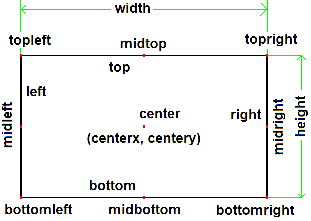

*Note:In Pygame, the origin (0, 0) is at the top-left corner of the screen, and coordinates increase as you go down and to the right. On a 1200 by 800 screen, the origin is at the top-left corner, and the bottom-right corner has the coordinates (1200, 800).*

Then we define the `blitme()` method, which will draw the image to the screen at the position specified by self.rect.


Now we will update alien_invasion.py so it creates a ship and calls the ship’s `blitme()` method

In [ ]:
import sys
import pygame
from settings import Settings
from ship import Ship

def run_game():
    # Initialize pygame, settings, and screen object.
    pygame.init()

    ai_settings = Settings()

    screen = pygame.display.set_mode((ai_settings.screen_width, ai_settings.screen_height))
    pygame.display.set_caption("Alien Invasion")

    # Make a ship.
    ship = Ship(screen)

    # Start the main loop for the game.
    while True:
      # Watch for keyboard and mouse events.
      for event in pygame.event.get():
        if event.type == pygame.QUIT:
          sys.exit()

      # Redraw the screen during each pass through the loop.
      screen.fill(ai_settings.bg_color)
      ship.blitme() #draw the ship

      # Make the most recently drawn screen visible.
      pygame.display.flip()

run_game()


We import Ship and then make an instance of Ship (named ship) after
the screen has been created. It must come before the main while loop so we don’t make a new instance of the ship on each pass through the loop. We draw the ship onscreen by calling `ship.blitme()` after filling the background, so the ship appears on top of the background.


We can now even add a background image. We add *bg.jpg* in the images folder and modify the code in *alien_invasion.py* as follows:

In [ ]:
import sys
import pygame
from settings import Settings
from ship import Ship

def run_game():
    # Initialize pygame, settings, and screen object.
    pygame.init()

    ai_settings = Settings()

    screen = pygame.display.set_mode((ai_settings.screen_width, ai_settings.screen_height))
    pygame.display.set_caption("Alien Invasion")

    # Make a ship.
    ship = Ship(screen)

    # Load the background image
    bg_img = pygame.image.load('images/bg.jpg')

    # Start the main loop for the game.
    while True:
      # Watch for keyboard and mouse events.
      for event in pygame.event.get():
        if event.type == pygame.QUIT:
          sys.exit()

      # Redraw the screen during each pass through the loop.
      screen.blit(bg_img, (0,0)) # draw the background image. The (0,0) specifies the positions of the top-left corner
      ship.blitme() #draw the ship

      # Make the most recently drawn screen visible.
      pygame.display.flip()

run_game()


When you run alien_invasion.py now, you should see the game
screen with our rocket ship sitting at the bottom center. Like this:   



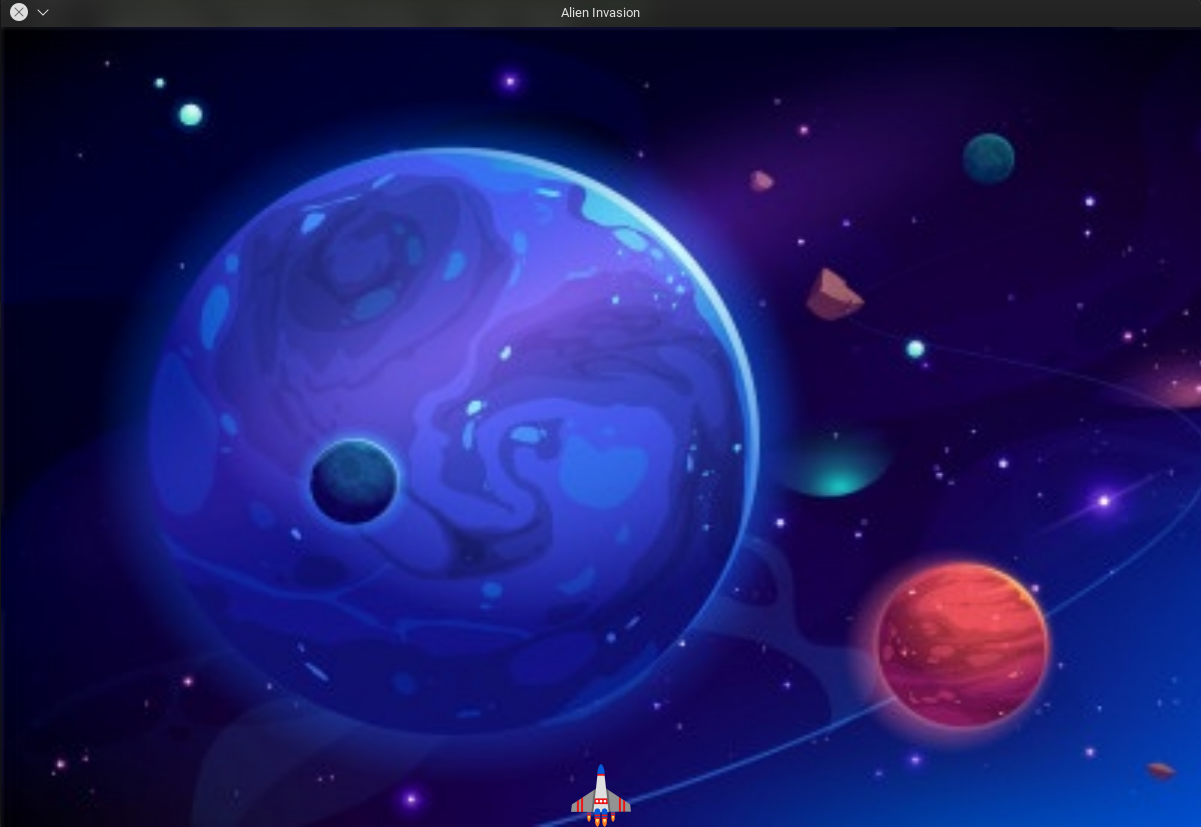

Through this, you got to learn how to make various game elements in pygame and also got to learn a bit about events. 